# Proyecto Python Humanidades Digitales

Nuestro objetivo aquí es reconstruir un proceso de formación, estancamiento y revolución de paradigmas científicos que descansa en el aporte de Thomas Kuhn a la filosofía de la ciencia. Este proyecto está inspirado en la operacionalización de Rogier De Langhe planteada en su artículo '[An Agent-Based Model of Thomas Kuhn's "The Structure of Scientific Revolutions"](https://www.ssoar.info/ssoar/handle/document/56432)', publicado en 2018.
Para eso, adoptaremos la metodología de los Modelos Basados en Agentes. Nuestros agentes serán científicos que publican artículos científicos en el tiempo. La  dinámica central estará basada en la interacción entre científicos y en la decisión de los mismos sobre qué presupuestos paradigmáticos tomar al realizar una publicación (cada agente realiza una publicación al año).

## Creamos la comunidad de científicos


Primero creamos una comunidad científica homogénea (una sola teoría domina a toda la comunidad en el estado inicial).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as coll
from random import seed
from random import random
from random import randint
from matplotlib import colors
from google.colab import files

In [2]:
POSITION_CONST = np.array([[0,1,1],[2,3,4]]) # Creamos una función que obtenga a los vecinos del elemento de la matriz deseado

def get_neighbors(a, r, c):
    C = POSITION_CONST[int(r!=0), (c!=0)*(1+int(c!=(a.shape[1]-1)))]
    N = a[max(r-1,0):r+2,max(c-1,0):c+2].ravel()
    return N[np.where(np.arange(len(N))!=C)[0]]

In [3]:
def scientists1(a,b): # Creamos una función que cree un DataFrame en el cual guardaremos todos los datos de lxs científicxs (agentes).
  assumptions = [] # Creamos una lista donde stackear los códigos de las teorías sostenidas por lxs científicxs.
  for i in range(0, a*b):
    assumptions.append(10) # Asignamos un solo código a cada científicx, representando una sola teoría científica.
  character = [] # Creamos una lista en la que coloquemos la variable de carácter de lx científicx (donde 0 es extremadamente conservador y 1 extremdamente entusiasta).
  for j in range(0, a*b):
    character.append(random()) # Asignamos un valor de carácter a cada científicx.
  agents = pd.DataFrame({'Character': character, 'Assumptions': assumptions, 'Neighbors': [[] for _ in range(a*b)]}) # Organizamos la información en un pandas.DataFrame
  matrix = [list(i) for i in zip(*[iter(list(agents.index))]*b)] # Construimos una matriz con todos los agentes a fin de ubicar sus vecinos.
  matrix = np.array(matrix) # Volvemos el objeto un np.array a fin de poder aplicar el algoritmo identificador de vecinos.
  for i in range(0,len(agents.index)):
    neighbors = list(get_neighbors(matrix, int(np.where(matrix == i)[0]), int(np.where(matrix == i)[1]))) # Colocamos como dato de cada agente sus vecinos (a la Moore).
    agents.at[i,'Neighbors'] = neighbors
  theories = pd.crosstab(agents['Assumptions'], 0).transpose() # Creamos un DataFrame que stackee tanto las teorías existentes como la cantidad de publicaciones realizadas dentro de cada teoría en el año.
  return agents, theories

In [4]:
seed(10) # Establecemos una seed a fin de que nuestro modelo sea reproducible
cientificos, teoria = scientists1(30,30)

In [5]:
cientificos # Visualizamos el DataFrame que contiene la información de nuestros agentes

,Character,Assumptions,Neighbors
0,0.571403,10,"[1, 30, 31]"
1,0.428889,10,"[0, 2, 30, 31, 32]"
2,0.578091,10,"[1, 3, 31, 32, 33]"
3,0.206098,10,"[2, 4, 32, 33, 34]"
4,0.813321,10,"[3, 5, 33, 34, 35]"
...,...,...,...
895,0.158059,10,"[864, 865, 866, 894, 896]"
896,0.912880,10,"[865, 866, 867, 895, 897]"
897,0.093881,10,"[866, 867, 868, 896, 898]"
898,0.360874,10,"[867, 868, 869, 897, 899]"


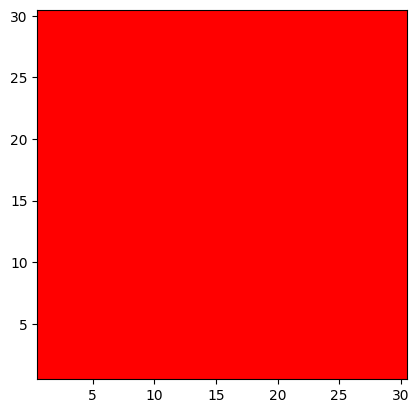

In [6]:
grid = [list(i) for i in zip(*[iter(list(cientificos['Assumptions']))]*30)] # Ahora construimos una grilla a fin de graficar visualmente la comunidad científica con múltiples teorías.
grid = np.array(grid)
rows, cols = grid.shape
plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
           cmap = 'prism') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, tenemos un escenario completamente homogéneo.

Ahora creamos una comunidad científica heterogénea (diversas teorías competidoras coexisten al inicio).

In [7]:
def scientists2(a,b): # Creamos una función que cree un DataFrame en el cual guardaremos todos los datos de lxs científicxs (agentes).
  assumptions = [] # Creamos una lista donde stackear los códigos de las teorías sostenidas por lxs científicxs.
  for i in range(0, a*b):
    assumptions.append(randint(0,a*b)) # Asignamos códigos (números enteros) al azar, representando múltiples teorías científicas.
  character = [] # Creamos una lista en la que coloquemos la variable de carácter de lx científicx (donde 0 es extremadamente conservador y 1 extremdamente entusiasta).
  for j in range(0, a*b):
    character.append(random()) # Asignamos un valor de carácter a cada científicx.
  agents = pd.DataFrame({'Character': character, 'Assumptions': assumptions, 'Neighbors': [[] for _ in range(a*b)]}) # Organizamos la información en un pandas.DataFrame
  matrix = [list(i) for i in zip(*[iter(list(agents.index))]*b)] # Construimos una matriz con todos los agentes a fin de ubicar sus vecinos.
  matrix = np.array(matrix) # Volvemos el objeto un np.array a fin de poder aplicar el algoritmo identificador de vecinos.
  for i in range(0,len(agents.index)):
    neighbors = list(get_neighbors(matrix, int(np.where(matrix == i)[0]), int(np.where(matrix == i)[1]))) # Colocamos como dato de cada agente sus vecinos (a la Moore).
    agents.at[i,'Neighbors'] = neighbors
  theories = pd.crosstab(agents['Assumptions'], 0).transpose() # Creamos un DataFrame que stackee tanto las teorías existentes como la cantidad de publicaciones realizadas dentro de cada teoría en el año.
  return agents, theories

In [8]:
seed(10)
cientificos, teoria = scientists2(30,30)

In [9]:
cientificos

,Character,Assumptions,Neighbors
0,0.084985,585,"[1, 30, 31]"
1,0.944340,33,"[0, 2, 30, 31, 32]"
2,0.753091,439,"[1, 3, 31, 32, 33]"
3,0.850893,494,"[2, 4, 32, 33, 34]"
4,0.815214,591,"[3, 5, 33, 34, 35]"
...,...,...,...
895,0.440886,563,"[864, 865, 866, 894, 896]"
896,0.925828,266,"[865, 866, 867, 895, 897]"
897,0.482881,584,"[866, 867, 868, 896, 898]"
898,0.648426,494,"[867, 868, 869, 897, 899]"


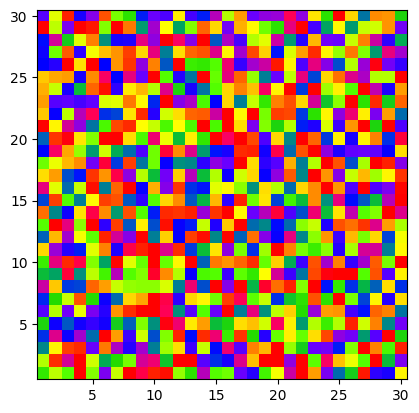

In [10]:
grid = [list(i) for i in zip(*[iter(list(cientificos['Assumptions']))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
grid = np.array(grid)
rows, cols = grid.shape
plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
           cmap = 'prism') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).


Finalmente, creamos el caso de una comunidad científica escindida (dos grandes teorías gobiernan la comunidad en el estado inicial).

In [11]:
def scientists3(a,b): # Creamos una función que cree un DataFrame en el cual guardaremos todos los datos de lxs científicxs (agentes).
  assumptions = [] # Creamos una lista donde stackear los códigos de las teorías sostenidas por lxs científicxs.
  for i in range(0, round(a*b/2)):
    assumptions.append(9) # Asignamos un sólo código a la mitad de científicxs, representando la primera teoría dominante.
  for i in range(round(a*b/2), a*b):
    assumptions.append(132) # Asignamos un sólo código a la otra mitad de científicxs, representando la segunda teoría dominante.
  character = [] # Creamos una lista en la que coloquemos la variable de carácter de lx científicx (donde 0 es extremadamente conservador y 1 extremdamente entusiasta).
  for j in range(0, a*b):
    character.append(random()) # Asignamos un valor de carácter a cada científicx.
  agents = pd.DataFrame({'Character': character, 'Assumptions': assumptions, 'Neighbors': [[] for _ in range(a*b)]}) # Organizamos la información en un pandas.DataFrame
  matrix = [list(i) for i in zip(*[iter(list(agents.index))]*b)] # Construimos una matriz con todos los agentes a fin de ubicar sus vecinos.
  matrix = np.array(matrix) # Volvemos el objeto un np.array a fin de poder aplicar el algoritmo identificador de vecinos.
  for i in range(0,len(agents.index)):
    neighbors = list(get_neighbors(matrix, int(np.where(matrix == i)[0]), int(np.where(matrix == i)[1]))) # Colocamos como dato de cada agente sus vecinos (a la Moore).
    agents.at[i,'Neighbors'] = neighbors
  theories = pd.crosstab(agents['Assumptions'], 0).transpose() # Creamos un DataFrame que stackee tanto las teorías existentes como la cantidad de publicaciones realizadas dentro de cada teoría en el año.
  return agents, theories

In [12]:
seed(10)
cientificos, teoria = scientists3(30,30)

In [13]:
cientificos

,Character,Assumptions,Neighbors
0,0.571403,9,"[1, 30, 31]"
1,0.428889,9,"[0, 2, 30, 31, 32]"
2,0.578091,9,"[1, 3, 31, 32, 33]"
3,0.206098,9,"[2, 4, 32, 33, 34]"
4,0.813321,9,"[3, 5, 33, 34, 35]"
...,...,...,...
895,0.158059,132,"[864, 865, 866, 894, 896]"
896,0.912880,132,"[865, 866, 867, 895, 897]"
897,0.093881,132,"[866, 867, 868, 896, 898]"
898,0.360874,132,"[867, 868, 869, 897, 899]"


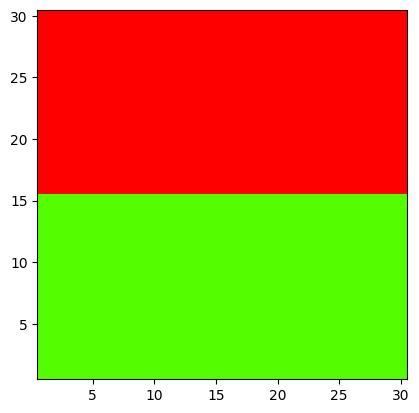

In [14]:
grid = [list(i) for i in zip(*[iter(list(cientificos['Assumptions']))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
grid = np.array(grid)
rows, cols = grid.shape
plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
           cmap = 'prism') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, tenemos un escenario escindido en dos teorías dominantes.


## Ahora construimos el modelo dinámico

Nuestro trabajo ahora consiste en construir reglas de juego que generen una dinámica a partir de la configuración inicial planteada en el apartado anterior. Para ello, utilizaremos el trazo de los agentes y su ascripción a ciertas teorías científicas como variables base.

Primero crearemos una función que compute la fe de cada científicx en su propia teoría. La fórmula empleada es la siguiente:

\begin{equation}
F_{i} = \frac{(A(T_{i})+1)^\alpha}{P(T_{i})+1}
\end{equation}

Donde $F_{i}$ es la fe de lx científicx $i$ en su teoría, $A(T_{i})$ es la adscripción de lxs vecinxs de $i$ a su teoría, $P(T_{i})$ es la cantidad de publicaciones históricas hechas en la teoría de $i$ y $\alpha$ es un coeficiente potenciador de la adscripción (parámetro establecido por el usuario).

In [15]:
def faith(agents, theories, t,  p, alpha): # Construimos una función que compute la fe de cada científico en su propia teoría.
  Faith = list(np.zeros(len(agents.index)))
  for i in range(0,len(agents.index)):
    neigh_theories = [] # Creamos una lista vacía.
    for j in agents['Neighbors'][i]: # Asignamos los códigos de las teorías de los vecinos de lx científicx en cuestión.
      neigh_theories.append(agents.iloc[j,1])
    theory = agents['Assumptions'][i]
    Adoption = neigh_theories.count(theory) # Calculamos la adopción de la teoría en la vecindad de lx científicx en cuestión (cuántos vecinos abrazan la misma teoría que unx).
    Publications = theories[theory][t] # Extraemos las publicaciones acumuladas en la teoría en  el año t.
    if agents['Character'][i] <= p: # Construimos un condicional de forma tal que los agentes más entusiastas tienen más aversión a teorías que cuentan con un cúmulo grande de publicaciones.
      Faith[i]= (Adoption + 1)**alpha/(Publications + 1) # El índice alpha determinará qué tantos beneficios se pueden extraer del grado de adopción de la teoría (oportunidades de especialización, apoyo, retroalimentación).
    else:
      Faith[i]= (Adoption + 1)**alpha/((Publications + 1)**(agents['Character'][i]*2)) # Esta fórmula alternativa vale para los agentes más entusiastas, a los cuales les afecta más la acumulación de publicaciones.
  return Faith

Ahora crearemos un algoritmo de elección de teoría para cada científicx en un año dado. Las fórmulas que computan las probabilidades son las siguiente:

\begin{equation}
P_{T_{v}} = \frac{F_{v}}{\sum_{n=1}^V F_{n}+F_{i}D+I}
\\
P_{T_{i}} = \frac{F_{i}D}{\sum_{n=1}^V F_{n}+F_{i}D+I}
\\
P_{I} = \frac{I}{\sum_{n=1}^V F_{n}+F_{i}D+I}
\end{equation}

Donde $P_{T_{v}}$ es la probabilidad de que lx científicx $i$ elija la teoría de su vecino $v$, $F_{v}$ es la fe de $v$ en su teoría, $V$ es el total de vecinos de $i$, $D$ es un coeficiente de dependencia del camino, $P_{T_{i}}$ es la probabilidad de que $i$ persista en su propia teoría, $P_{I}$ es la probabilidad de que $i$ genere una teoría inédita e $I$ es un coeficiente de innovación. $D$ y $I$ son parámetros establecidos por el usuario.

In [16]:
def choose(agents, faith, innovation_rate, path, theory): # Construimos un algoritmo de decisión de la teoría asumida por lx científicx, corazón de nuestro modelo.
  assumptions = list(np.zeros(len(agents.index))) # Empezamos creando una lista de assumptions, rellenándola de 0's.
  for i in range(0,len(agents.index)): # Para cada agente, realizamos lo siguiente:
    neigh_faith = [] # Creamos una lista en la cual almacenar la fe de sus vecinos.
    prob = [] # Creamos una lista en la que almacenar las probabilidades.
    neighbors = agents['Neighbors'][i] # Extraemos los vecinos del agente i.
    for j in neighbors:
      neigh_faith.append(faith[j]) # Para cada uno de sus vecinos, extraemos su fe y lo colocamos en la lista creada.
    for n in neigh_faith: # Para cada valor de fe de sus vecinos, computamos las probabilidades de que adopte la teoría de ellos según las fórmulas presentadas arriba.
      prob.append(n/(sum(neigh_faith)+(innovation_rate*agents['Character'][i]/(sum(neigh_faith)+faith[i]))+faith[i]*path)) # Construimos las probabilidades de que lx científicx adopte la teoría de cada vecinx.
    prob.append(faith[i]*path/(sum(neigh_faith)+(innovation_rate*agents['Character'][i]/(sum(neigh_faith)+faith[i]))+faith[i]*path)) # Construimos la probabilidad de que lx científicx persista en su teoría actual.
    prob.append(innovation_rate*agents['Character'][i]/(sum(neigh_faith)+(innovation_rate*agents['Character'][i]/(sum(neigh_faith)+faith[i]))+faith[i]*path)) # Construimos la probabilidad de que lx científicx innove.
    prob_acc = list(np.cumsum(prob)) # A fin de operacionalizar las probabilidades en un algoritmo de decisión, hacemos una lista con las probabilidades acumuladas (el último elemento debe ser 1).
    choice = random() # Usamos un algoritmo de números pseudo-aleatorios para simular azar.
    if choice < prob_acc[-3]: # Si el número aleatorio no cae en las probabilidades de innovación o dependencia del camino, se evalúan las posibilidades de que cambie a alguna de las teorías de sus vecinxs.
      for m in range(0,len(prob_acc)-2):
        if choice < prob_acc[m]: # Se evalúa si el número que representa la decisión cae en la cota de probabilidad de alguna de las teorías de los vecinos.
          assumptions[i] = agents['Assumptions'][neighbors[m]] # Si el número al azar está dentro del espacio de probabilidad de m, entonces lx científicx adoptará la teoría de su vecino m-ésimo.
          break
    elif choice < prob_acc[-2]: # Se evalúa si el número que representa la decisión cae en la cota de probabilidad de dependencia del camino.
      assumptions[i] = agents['Assumptions'][i] # Si se cumple la probabilidad de que lx científicx persista en su teoría, no cambia nada.
    else: # Se evalúa si el número que representa la decisión cae en la cota de innovación.
      new_theory = randint(0,len(agents.index)**2) # Si el número al azar que representa la decisión no se encuentra en las probabilidades evaluadas anteriormente, tenemos un caso de innvación. Por tanto, se debe crear una teoría nueva (nuevo código).
      while new_theory in list(theory.columns): # Esta condición while nos servirá para asegurarnos que la innovación sea auténtica: que se plantee una teoría que no haya existido previamente.
        new_theory = randint(0,len(agents.index)**2)
      assumptions[i] = new_theory # Asignamos la teoría nueva a lx científicx
  for i in range(0,len(agents.index)):
    agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
  return agents

Una vez hemos construido el corazón del modelo, integramos todas las funciones construidas en una función que ejecute toda la dinámica del modelo. Como tenemos 3 condiciones iniciales, construiremos también funciones que ejecuten el modelo con las 3 condiciones iniciales diferentes.

In [17]:
def dynamics(Initial_state, a,b,innovation_rate, path, t, p, alpha): # Integramos ahora las distintas funciones en una sola dinámica.
  if Initial_state == 'hom': # Si el usuario lo desea, se ejecutará el modelo partiendo del estado inicial homogéneo (todos sostienen la misma teoría).
    agents, theories = scientists1(a,b)
  elif Initial_state == 'het': # Si el usuario lo desea, se ejecutará el modelo partiendo del estado inicial heterogéneo (existe amplia diversidad de teorías en la comunidad).
    agents, theories = scientists2(a,b)
  elif Initial_state == 'bif': # Si el usuario lo desea, se ejecutará el modelo partiendo del estado inicial bifurcado (dos teorías dominan el panorama científico inicial).
    agents, theories = scientists3(a,b)
  else:
    print('Debes escoger un estado inicial admitido por el modelo: "hom", "het" o "bif"')
    return
  theories_ads = theories # Creamos un objeto que almacenará la cantidad de adscritos a las teorías.
  theories_pub = theories # Creamos un objeto que almacenará la cantidad de publicaciones hechas en cada teoría.
  assumptions = pd.DataFrame(agents['Assumptions']) # Guardamos las secuencias de códigos de teorías sostenidas por cada científico en un DataFrame a fin de posteriormente poder graficar el modelo.
  assumptions.rename(columns = {'Assumptions' : 0}, inplace = True)
  for i in range(0, t): # Para cada año, hacemos lo siguiente
    F = faith(agents, theories_pub, i, p, alpha) # Computamos la fe de los agentes
    agents = choose(agents, F, innovation_rate, path, theories_pub) # En base a su fe, ejecutamos el algoritmo de decisión para cada agente
    assumptions[i+1] = list(agents['Assumptions']) # Registramos las nuevas teorías en el objeto creado anteriormente.
    new_theories = pd.crosstab(agents['Assumptions'], i+1).transpose() # Hacemos una tabla de frecuencia de las teorías y la transponemos matricialmente a fin de manipularla.
    theories_ads = pd.concat([theories_ads, new_theories]) # Acumulamos la historia de adscripción a cada teoría en cada año t.
    theories_pub = pd.concat([theories_pub, new_theories]) # Acumulamos la historia de publicaciones a cada teoría en cada año t.
    theories_pub.loc[i+1,:] = theories_pub.loc[i:(i+2),:].sum()
  return assumptions, theories_ads, theories_pub

In [18]:
seed(10)
assumptions, adscritos, publicaciones = dynamics('hom', 30, 30, 1.1, 6.5, 300, 0.7, 5.8)

<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [19]:
seed(10)
assumptions2, adscritos2, publicaciones2 = dynamics('het', 30, 30, 1.1, 6.5, 300, 0.7, 5.8)

<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [20]:
seed(10)
assumptions3, adscritos3, publicaciones3 = dynamics('bif', 30, 30, 1.1, 6.5, 300, 0.7, 5.8)

<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents['Assumptions'][i] = assumptions[i] # Ahora actualizamos el DataFrame de información de los agentes con las teorías ahora acogidas por lxs científicxs.
<ipython-input-16-0043c6e1c12f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

## Gráficas

Ahora graficaremos la evolución del número de teorías en el tiempo.

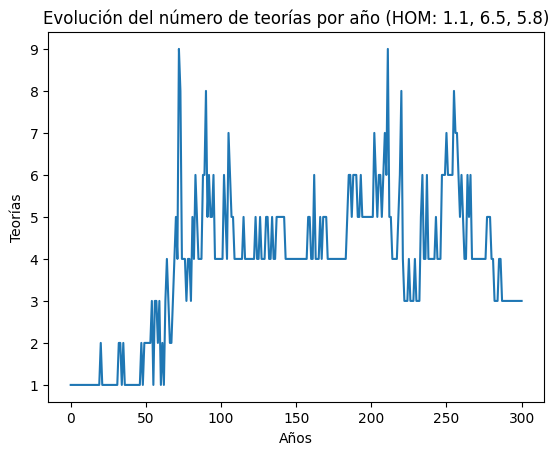

In [ ]:
y = []
for i in assumptions:
  y.append(len(set(assumptions[i])))
plt.plot(list(assumptions.columns), y)
plt.title('Evolución del número de teorías por año (HOM: 1.1, 6.5, 5.8)')
plt.xlabel('Años')
plt.ylabel('Teorías')
plt.show()



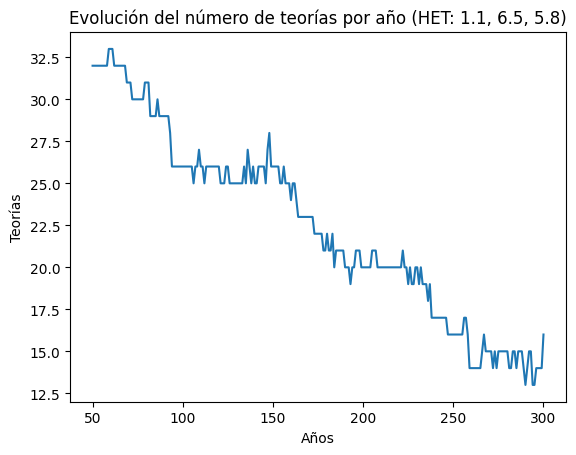

In [21]:
y = []
for i in assumptions2.iloc[:,50::]:
  y.append(len(set(assumptions2.iloc[:,50::][i])))
plt.plot(list(assumptions2.iloc[:,50::].columns), y)
plt.title('Evolución del número de teorías por año (HET: 1.1, 6.5, 5.8)')
plt.xlabel('Años')
plt.ylabel('Teorías')
plt.show()

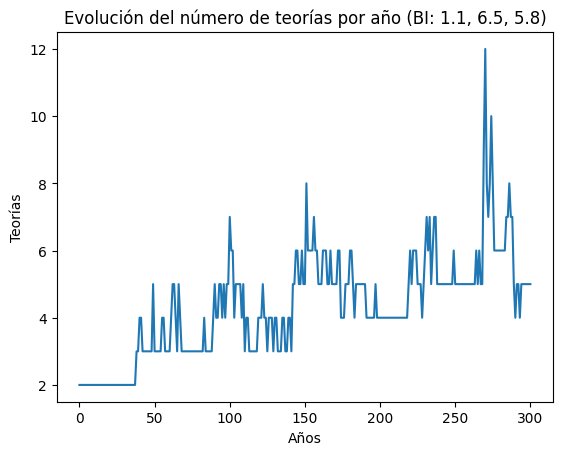

In [ ]:
y = []
for i in assumptions3:
  y.append(len(set(assumptions3[i])))
plt.plot(list(assumptions.columns), y)
plt.title('Evolución del número de teorías por año (BI: 1.1, 6.5, 5.8)')
plt.xlabel('Años')
plt.ylabel('Teorías')
plt.show()

## Ploteando el ABM

Ahora vamos a descargar un plot por cada año del modelo a fin de construir un gif que muestre la evolución del mismo.

In [ ]:
for j in range(230,234):
  print(set(assumptions[j]))

{153739, 14763, 196347}
{153739, 14763, 196347}
{153739, 14763, 196347}
{273125, 475401, 153739, 14763, 196347}


Text(0.5, 0.01, 'Año : 233, N° Teorías: 5')

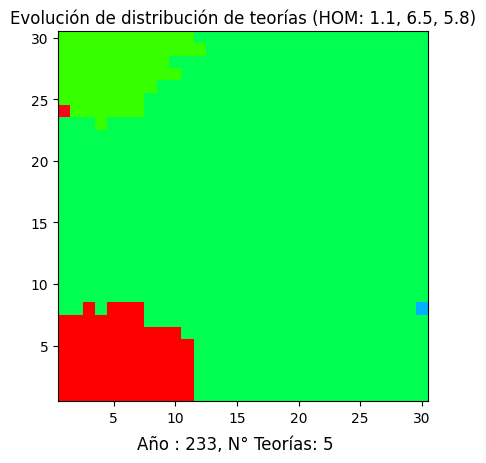

In [ ]:
t = 233
grid = [list(i) for i in zip(*[iter(list(assumptions[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
grid = np.array(grid)
rows, cols = grid.shape
plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
           cmap = 'hsv')
plt.title('Evolución de distribución de teorías (HOM: 1.1, 6.5, 5.8)')
plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions[t]))), wrap=True, horizontalalignment='center', fontsize=12)


In [ ]:
for t in range(0,10):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(10,20):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(20,30):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(30,40):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(40,50):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(50,60):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(60,70):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(70,80):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(80,90):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(90,101):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(101,111):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(111,121):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(121,131):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(131,141):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(141,151):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(151,161):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(161,171):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(171,181):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(181,191):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(191,201):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(201,211):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(211,221):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(221,231):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(231,241):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(241,251):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(251,261):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(261,271):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(271,281):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(281,291):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(291,301):
  grid = [list(i) for i in zip(*[iter(list(assumptions3[t]))]*30)] # Ahora construimos un grid a fin de graficar visualmente la comunidad científica con múltiples teorías.
  grid = np.array(grid)
  rows, cols = grid.shape
  plt.imshow(grid, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
            cmap = 'hsv') # Visualizamos en una grilla la comunidad científica. Debido a que se trata de la comunidad inicial, esto representa la etapa germinal de la disciplina en cuestión (múltiples teorías competidoras coexisten, lo que se refleja en los múltiples colores del gráfico).
  plt.title('Evolución de distribución de teorías (BIF: 1.1, 6.5, 5.8)')
  plt.figtext(0.5, 0.01, 'Año : ' + str(t) + ', N° Teorías: ' + str(len(set(assumptions3[t]))), wrap=True, horizontalalignment='center', fontsize=12)
  plt.savefig(str(t) + '.png')
  files.download(str(t) + '.png')
  plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>